### Intro 
The World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update. The World Happiness 2017, which ranks 155 countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.

### What you may learn here?
This notebook is a detailed investigation on world happiness. The art behind happiness has been revealed through amazing visualization. The picture of world happiness, impact factor for increased happiness score and region based happiness investigation will show a interesting scenerio of this dataset. Two regression model constructed at the end for happiness prediction and those works well.

### Language and Libraries

#### We'll use [Python](https://www.python.org/) language and  four libraries for this tutorial: [pandas](http://pandas.pydata.org/), [matplotlib](http://matplotlib.org/),  [seaborn](http://stanford.edu/~mwaskom/software/seaborn/) and [plotly](https://plot.ly/python/).

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as stats
import math
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
%matplotlib inline
import plotly.graph_objs as go

### Get Data n Take a look

In [2]:
df = pd.read_csv(r'E:\ML - Data\World Happiness Data\2015.csv')

In [3]:
df.head(5)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
Country                          158 non-null object
Region                           158 non-null object
Happiness Rank                   158 non-null int64
Happiness Score                  158 non-null float64
Standard Error                   158 non-null float64
Economy (GDP per Capita)         158 non-null float64
Family                           158 non-null float64
Health (Life Expectancy)         158 non-null float64
Freedom                          158 non-null float64
Trust (Government Corruption)    158 non-null float64
Generosity                       158 non-null float64
Dystopia Residual                158 non-null float64
dtypes: float64(9), int64(1), object(2)
memory usage: 14.9+ KB


In [5]:
df.shape

(158, 12)

In [6]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

#### Regions sorted by Happiness Score

In [7]:
df.groupby('Region')['Happiness Rank', 'Happiness Score', 'Standard Error', 'Economy (GDP per Capita)'].mean().sort_values(by="Happiness Score", ascending=False)

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita)
Region,,,,
Australia and New Zealand,9.500000,7.285000,0.037270,1.291880
North America,10.000000,7.273000,0.036960,1.360400
Western Europe,29.523810,6.689619,0.037625,1.298596
Latin America and Caribbean,46.909091,6.144682,0.061127,0.876815
Eastern Asia,64.500000,5.626167,0.037225,1.151780
Middle East and Northern Africa,77.600000,5.406900,0.046337,1.066973
Central and Eastern Europe,79.000000,5.332931,0.045208,0.942438
Southeastern Asia,81.222222,5.317444,0.042691,0.789054
Southern Asia,113.142857,4.580857,0.032161,0.560486


### Visualization of Hapiness Score with other Factors

##### Top Fifteen happiest countries in world and their Happiness Score


[<matplotlib.text.Text at 0xa81a908>, <matplotlib.text.Text at 0xaad16a0>]

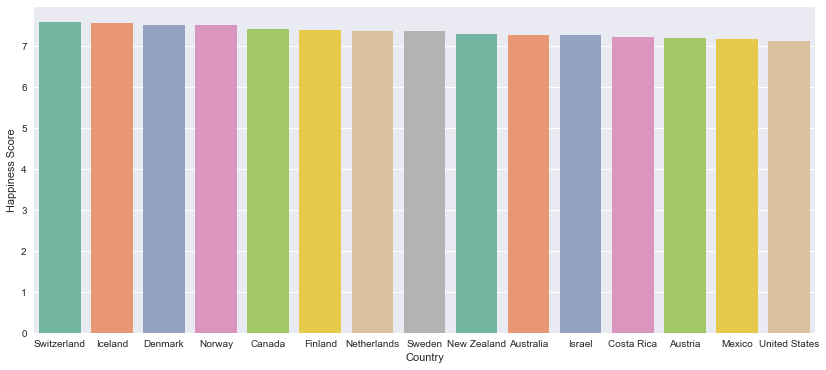

In [8]:
plt.figure(figsize=(14,6))
topCountry=df.sort_values(by=['Happiness Rank'],ascending=True).head(15)
ax=sns.barplot(x='Country',y='Happiness Score', data=topCountry, palette = 'Set2')
ax.set(xlabel='Country', ylabel='Happiness Score')

##### Top 30 country's region checking. Western Europe listed most! Southern asia least counts.

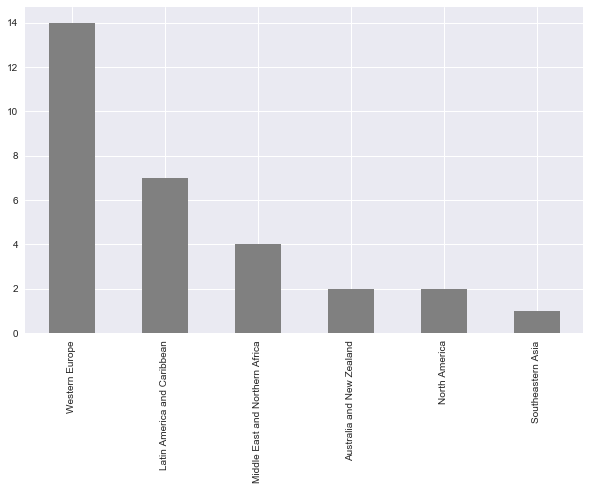

In [9]:
plt.figure(figsize=(10,6))
list = df.sort_values(by=['Happiness Rank'],ascending=True)['Region'].head(30).value_counts()
list.plot(kind = 'bar', color = 'grey')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000C13BD30>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000000000C8B1A20>], dtype=object)

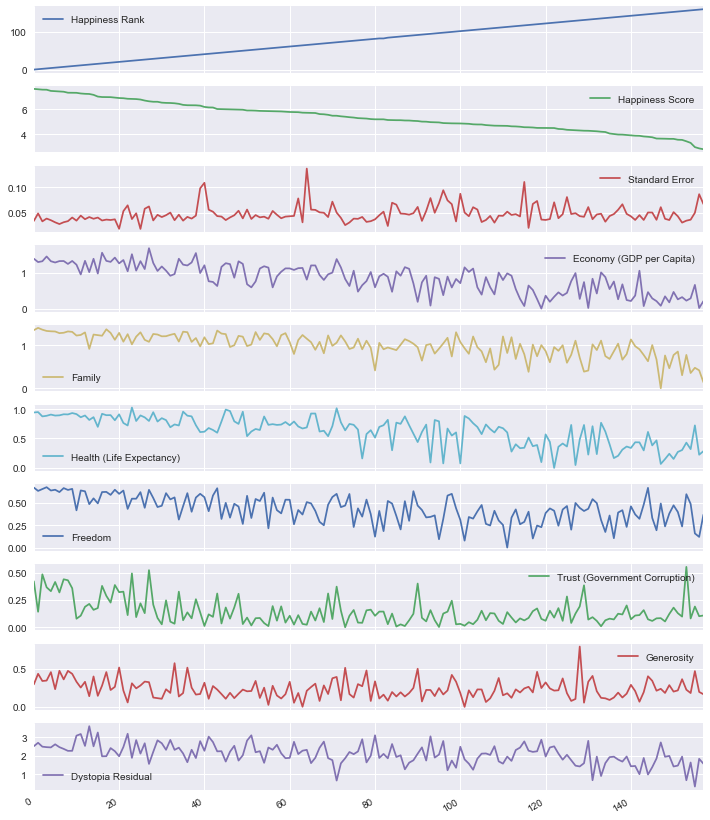

In [10]:
# Basic plotting on dataframe
df.plot(subplots=True, figsize=(12, 16))

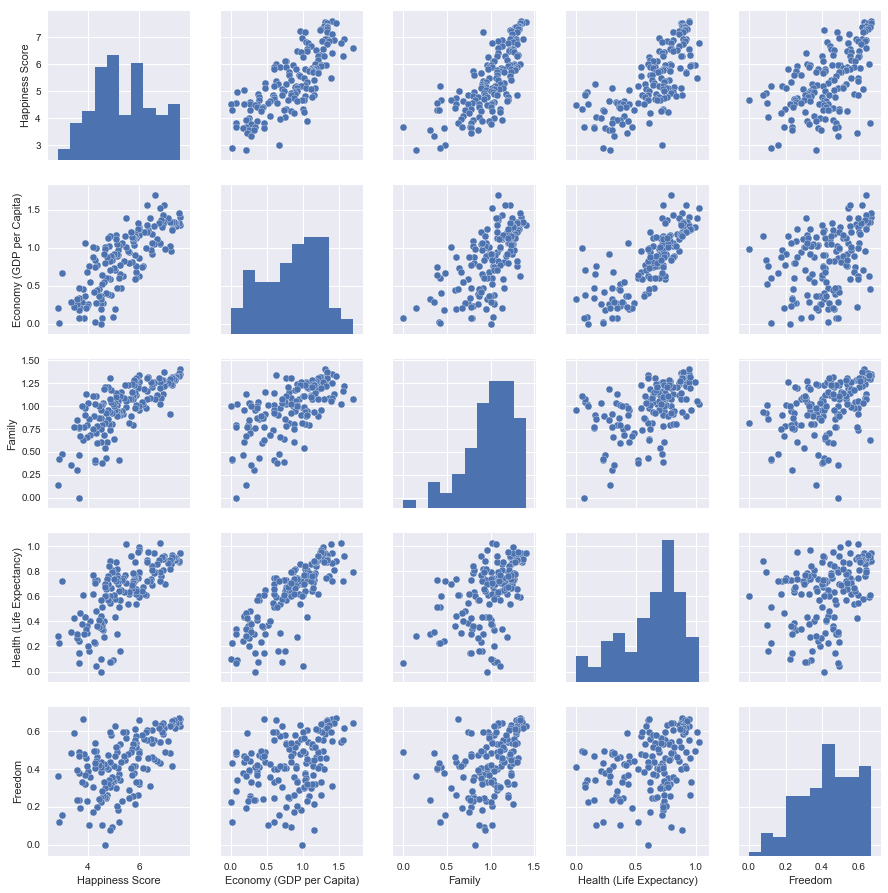

In [11]:
sns.pairplot(df[['Happiness Score','Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom']])

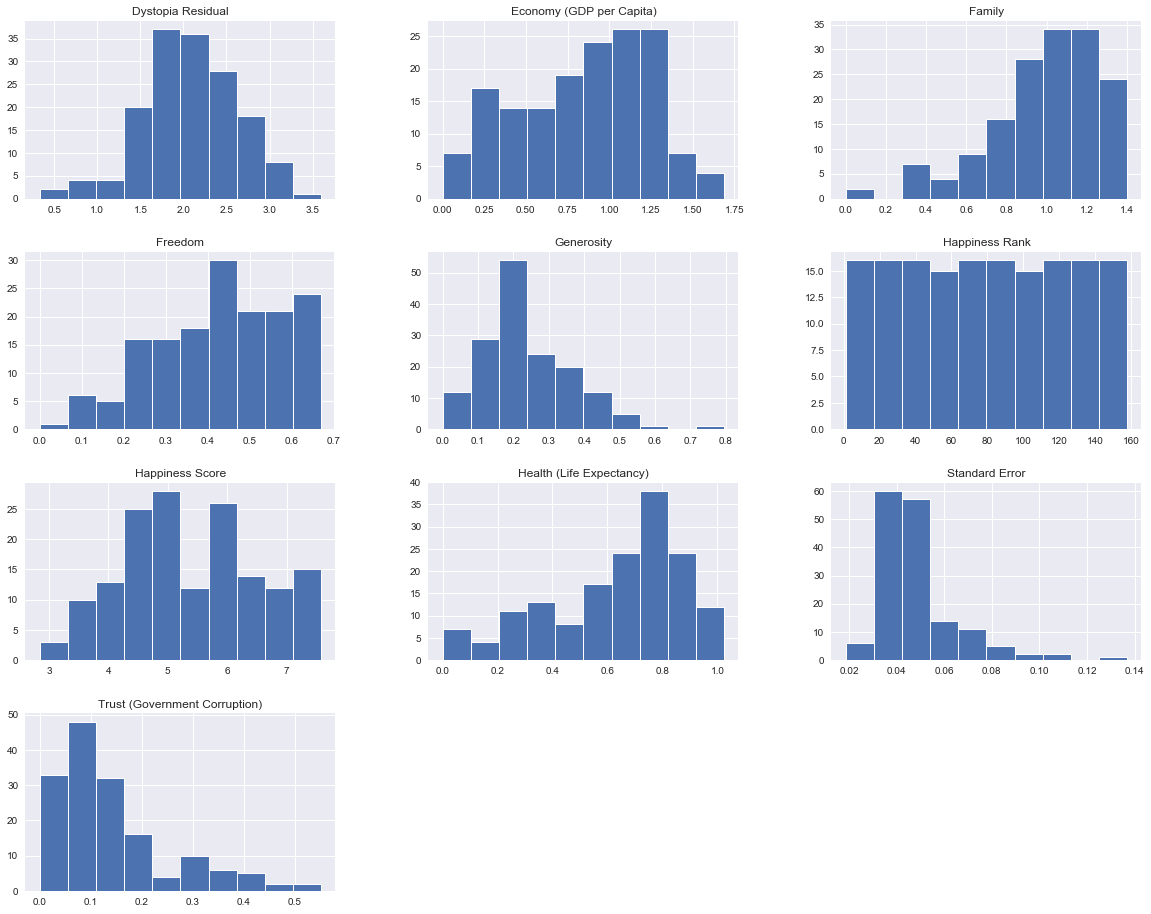

In [12]:
df.hist(edgecolor = 'white', linewidth = 1, figsize = (20,16))
plt.show()

##### Happiness Score is strongly correlated with Economy, Family & Health. 

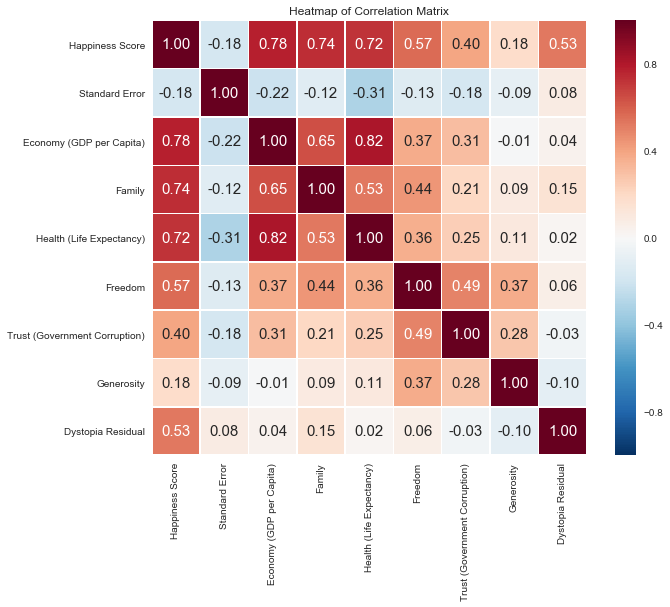

In [13]:
plt.figure(figsize=(10,8))
corr = df.drop(['Country','Region','Happiness Rank'],axis = 1).corr()
sns.heatmap(corr, cbar = True, square = True, annot=True, linewidths = .5, fmt='.2f',annot_kws={'size': 15}) 
sns.plt.title('Heatmap of Correlation Matrix')
plt.show()

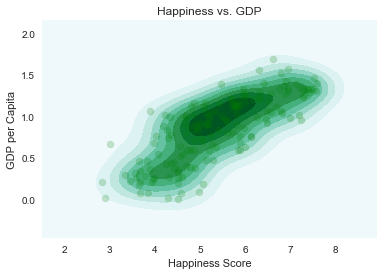

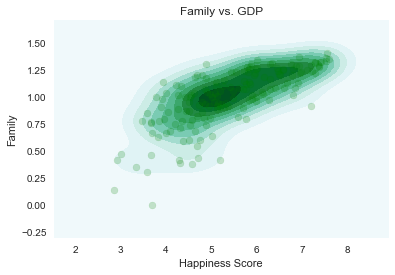

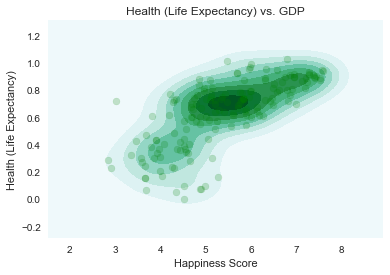

In [14]:
sns.kdeplot(df['Happiness Score'], df['Economy (GDP per Capita)'], shade=True)
plt.scatter(df['Happiness Score'], df['Economy (GDP per Capita)'], alpha=0.2, color='green')
plt.xlabel('Happiness Score')
plt.ylabel('GDP per Capita')
plt.title('Happiness vs. GDP')
plt.show()


sns.kdeplot(df['Happiness Score'], df['Family'], shade=True)
plt.scatter(df['Happiness Score'], df['Family'], alpha=0.2, color='green')
plt.xlabel('Happiness Score')
plt.ylabel('Family')
plt.title('Family vs. GDP')
plt.show()


sns.kdeplot(df['Happiness Score'], df['Health (Life Expectancy)'], shade=True)
plt.scatter(df['Happiness Score'], df['Health (Life Expectancy)'], alpha=0.2, color='green')
plt.xlabel('Happiness Score')
plt.ylabel('Health (Life Expectancy)')
plt.title('Health (Life Expectancy) vs. GDP')
plt.show()




#### Jointplot shows Happiness score increses with GDP increase

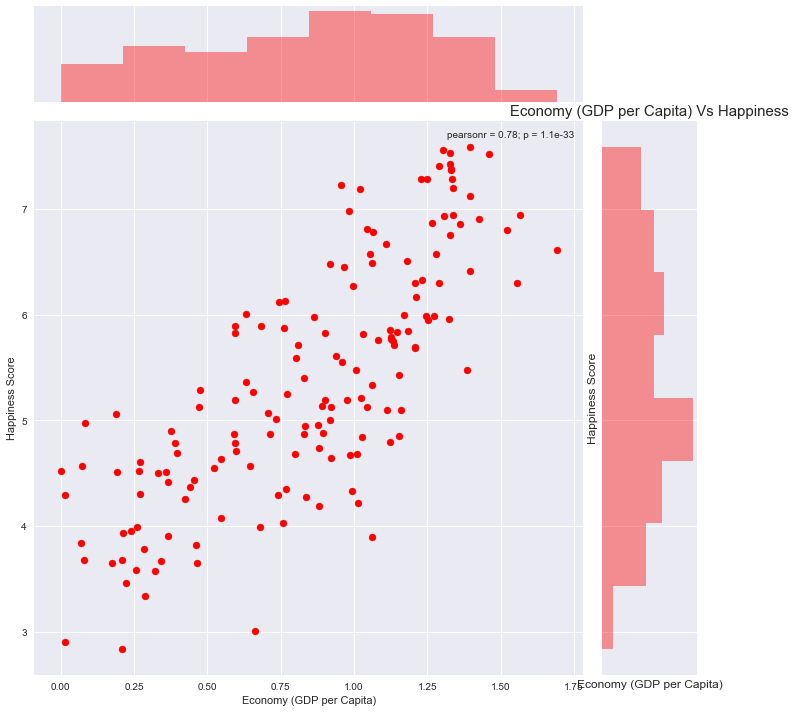

In [15]:
plt.figure(figsize=(12,12))
sns.jointplot(x = 'Economy (GDP per Capita)', y = 'Happiness Score', data = df, size=10, color='red')
plt.ylabel('Happiness Score', fontsize=12)
plt.xlabel('Economy (GDP per Capita)', fontsize=12)
plt.title('Economy (GDP per Capita) Vs Happiness', fontsize=15)
plt.show()

#### Linear Regression Plotting 

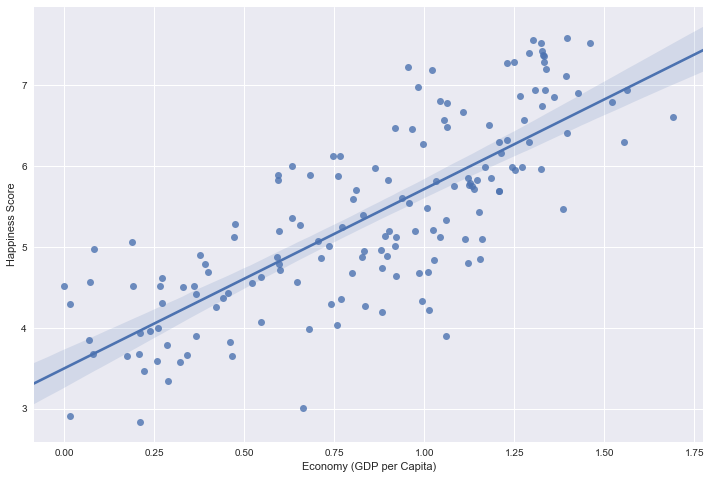

In [16]:
plt.figure(figsize=(12,8))
sns.regplot(x='Economy (GDP per Capita)',y='Happiness Score' ,data=df)
#so there is a linear relation between GDP & Happiness Score

##### Above figure, we've seen linear relationship with Happiness Score and GDP. Next shows generosity doesn't effect on Happiness Score. Linear regression ploting looks worse!

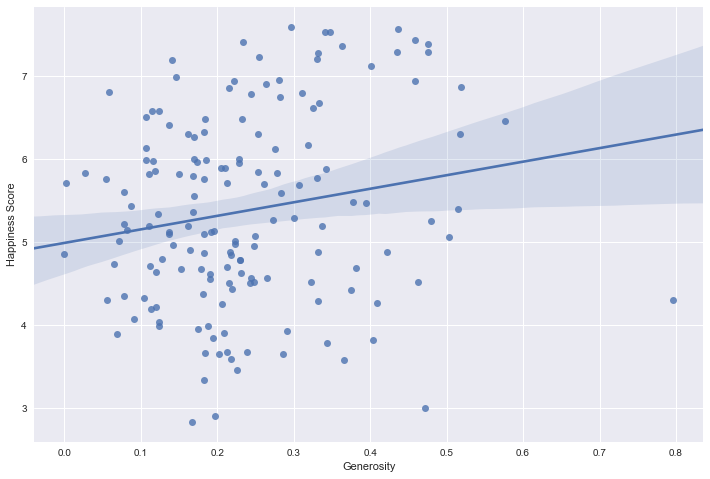

In [17]:
plt.figure(figsize=(12,8))
sns.regplot(x='Generosity',y='Happiness Score' ,data=df)

#### Take a detaied look on several factors vs Happiness Score regression. The straight line fits well means those  feature are strongly related with Happiness Score.

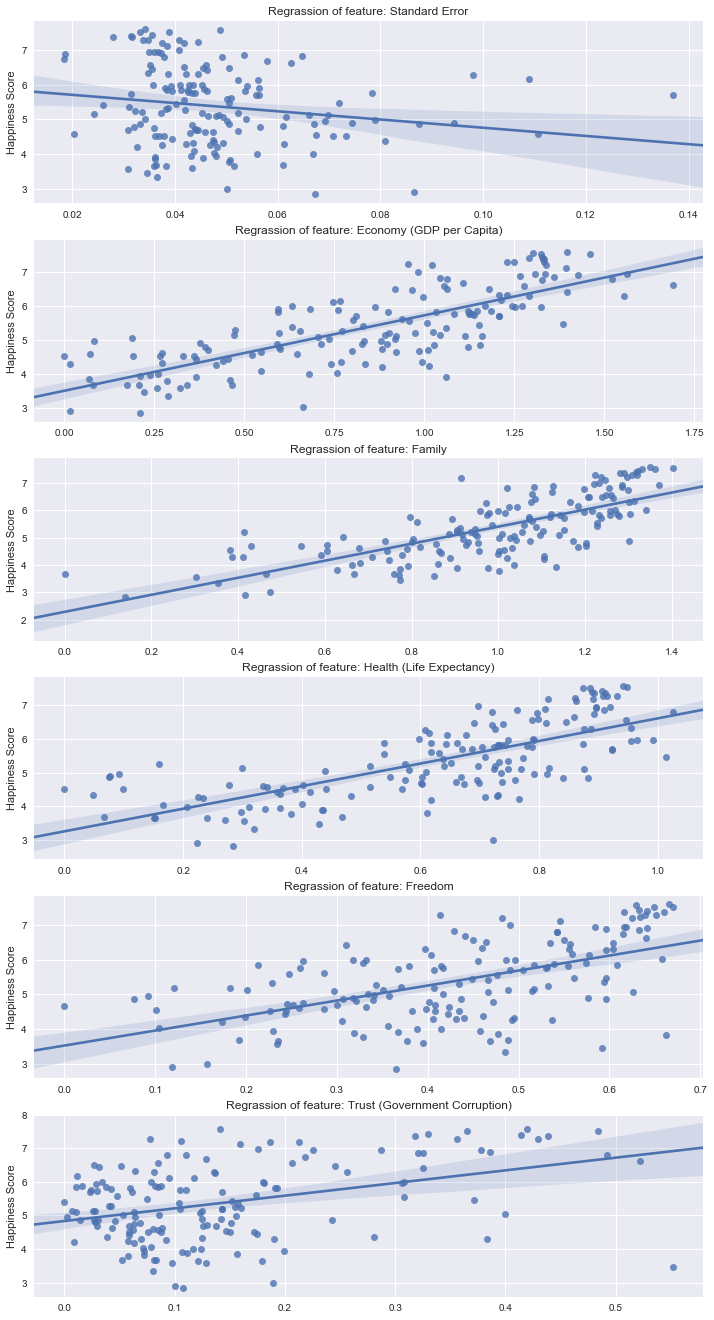

In [18]:
cols = ['Standard Error', 'Economy (GDP per Capita)','Family','Health (Life Expectancy)','Freedom','Trust (Government Corruption)']
plt.figure(figsize=(12,28*4))
gs = gridspec.GridSpec(28, 1)
for i, cn in enumerate(cols):
    ax = plt.subplot(gs[i])
    #sns.distplot(df1[cn], bins=50)
    sns.regplot(x=df[cn],y='Happiness Score' ,data=df)
    ax.set_xlabel('')
    ax.set_title('Regrassion of feature: ' + str(cn))
plt.show()

##### Most happiness score ranges between 4.5 to 6

C:\Users\rabiulawal\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning:

using a non-integer number instead of an integer will result in an error in the future



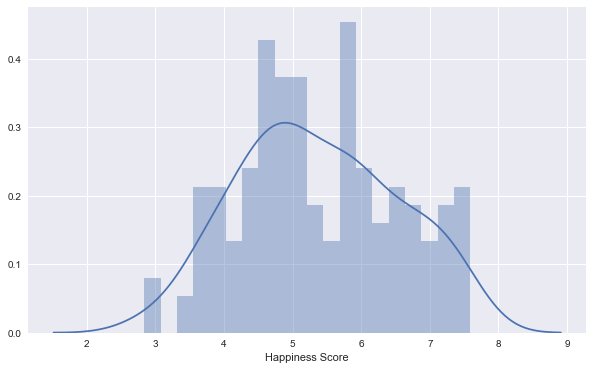

In [19]:
plt.figure(figsize=(10,6))
sns.distplot(df['Happiness Score'],kde=True, bins = 20)
plt.show()

### Regional Investigation

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000F62D470>], dtype=object)

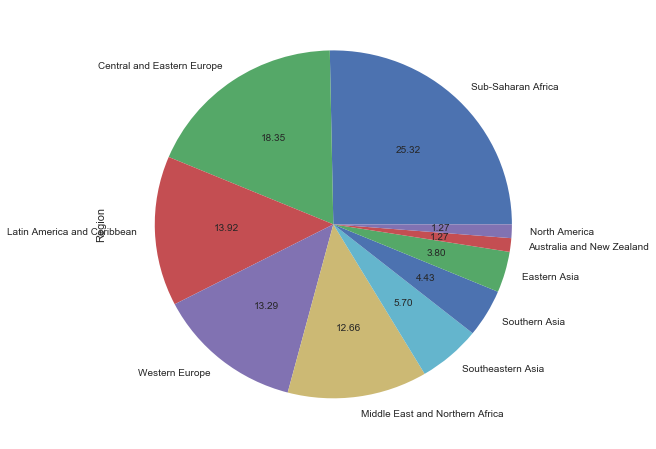

In [20]:
#Percantage on country's regional listing 
df['Region'].value_counts().plot.pie(subplots=True, figsize=(8, 8), autopct='%.2f')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

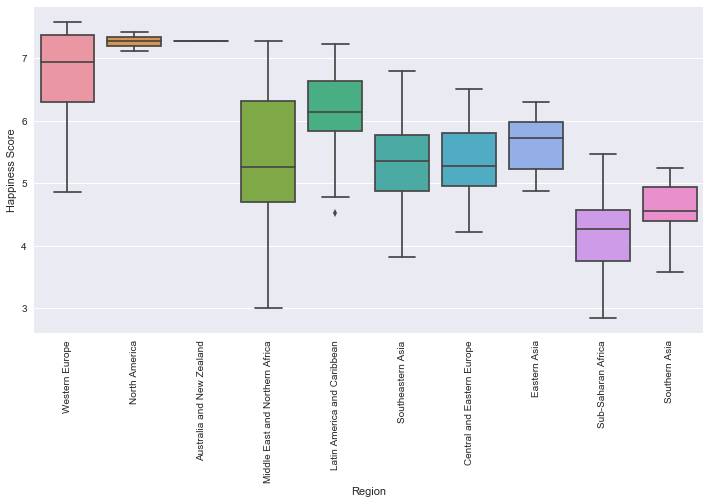

In [21]:
fig, axes = plt.subplots(figsize=(12, 6))
sns.boxplot(x='Region', y='Happiness Score', data = df)
plt.xticks(rotation=90)

Above plot shows Western Europe, North America and Australia and New Zealand are most happiest regions!

### Regions vs happiness features: closure look

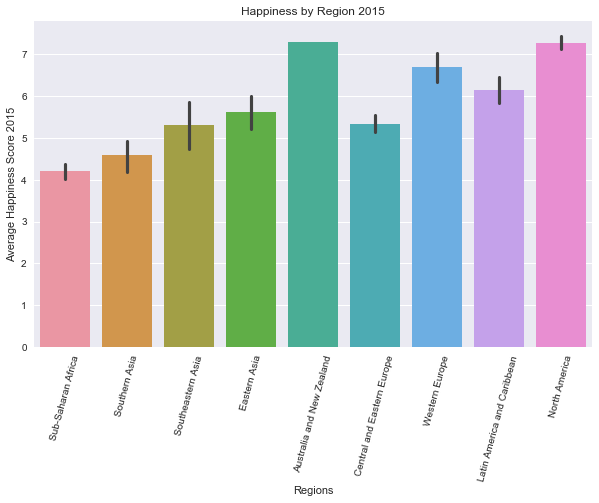

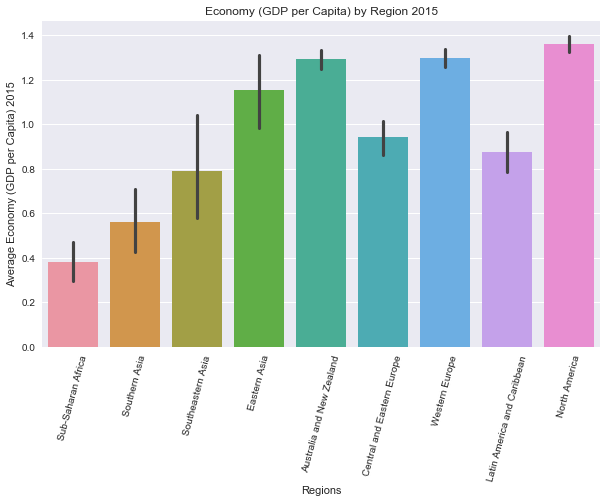

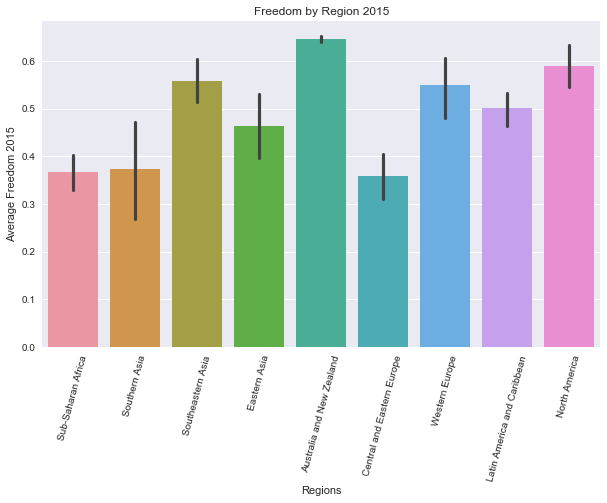

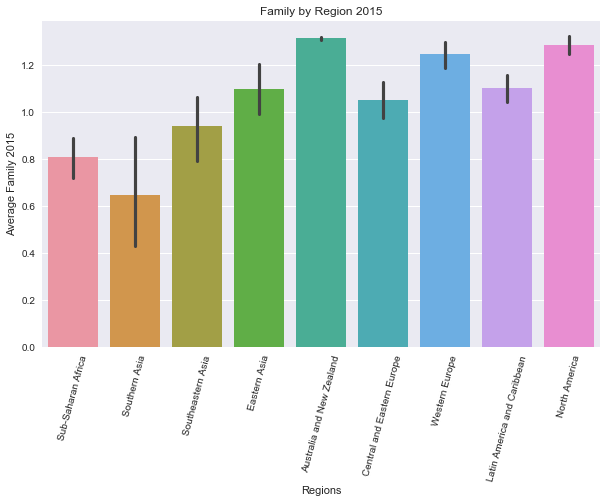

In [22]:
order =['Sub-Saharan Africa', 'Southern Asia', 'Southeastern Asia', 'Eastern Asia', 'Australia and New Zealand', 'Central and Eastern Europe', 'Western Europe', 'Latin America and Caribbean', 'North America']

plt.figure(figsize=(10,6))
sns.barplot(x=df['Region'], y=df['Happiness Score'], order=order)
plt.xticks(rotation=75)
plt.xlabel('Regions')
plt.ylabel('Average Happiness Score 2015')
plt.title('Happiness by Region 2015')
plt.show()

plt.figure(figsize=(10,6))
sns.barplot(x=df['Region'], y=df['Economy (GDP per Capita)'], order=order)
plt.xticks(rotation=75)
plt.xlabel('Regions')
plt.ylabel('Average Economy (GDP per Capita) 2015')
plt.title('Economy (GDP per Capita) by Region 2015')
plt.show()

plt.figure(figsize=(10,6))
sns.barplot(x=df['Region'], y=df['Freedom'], order=order)
plt.xticks(rotation=75)
plt.xlabel('Regions')
plt.ylabel('Average Freedom 2015')
plt.title('Freedom by Region 2015')
plt.show()

plt.figure(figsize=(10,6))
sns.barplot(x=df['Region'], y=df['Family'], order=order)
plt.xticks(rotation=75)
plt.xlabel('Regions')
plt.ylabel('Average Family 2015')
plt.title('Family by Region 2015')
plt.show()

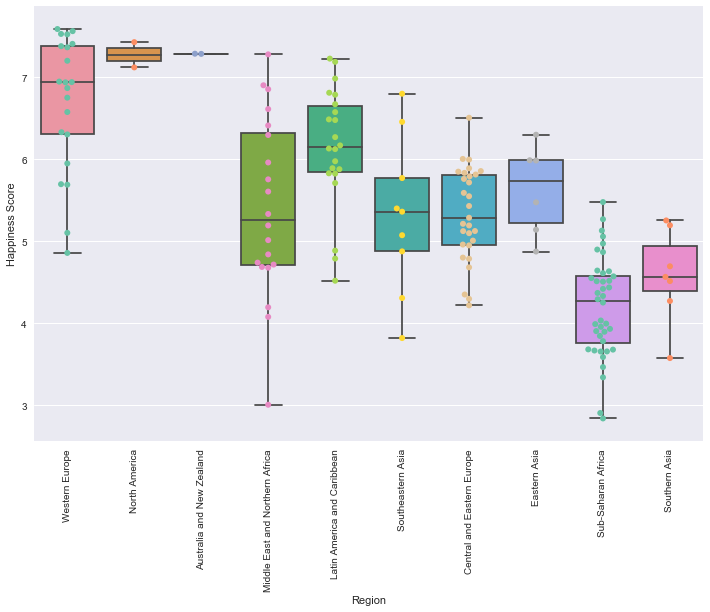

In [23]:
plt.figure(figsize=(12,8))
sns.boxplot(x="Region", y="Happiness Score", data=df, whis=np.inf)
sns.swarmplot(x="Region", y="Happiness Score",  data=df, split = True, palette='Set2', size = 6)
plt.xticks(rotation=90)
plt.show()

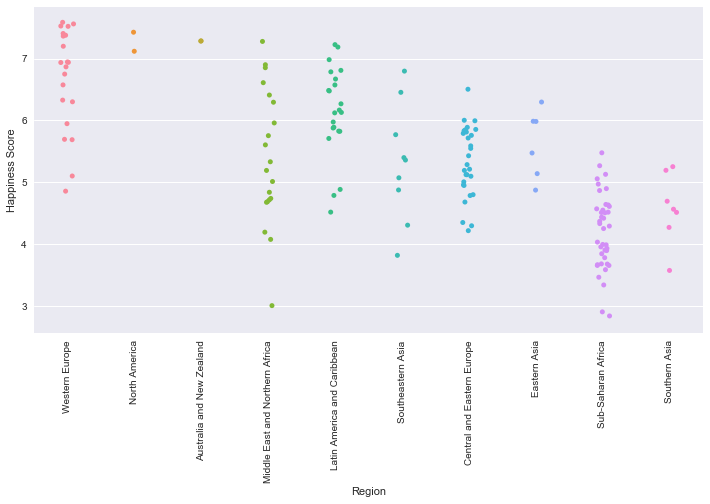

In [24]:
plt.figure(figsize=(12,6))
sns.stripplot(x="Region", y="Happiness Score", data=df, jitter=True)
plt.xticks(rotation=90)
plt.show()

### Let's check Europe and Asia

In [25]:
w_europe = df[df.Region=='Western Europe']
ec_europe = df[df.Region=='Central and Eastern Europe']
europe = pd.concat([w_europe,ec_europe],axis=0)
europe.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
5,Finland,Western Europe,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955


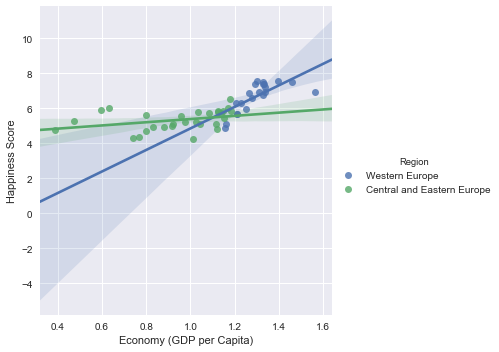

In [26]:
plt.figure(figsize=(12,6))
sns.lmplot(data=europe, x='Economy (GDP per Capita)', y='Happiness Score', hue="Region")
plt.show()

##### Western Europe is happier than Central and Eastern Europe. 

##### Check it on pairplot. Blue dots are for western region.

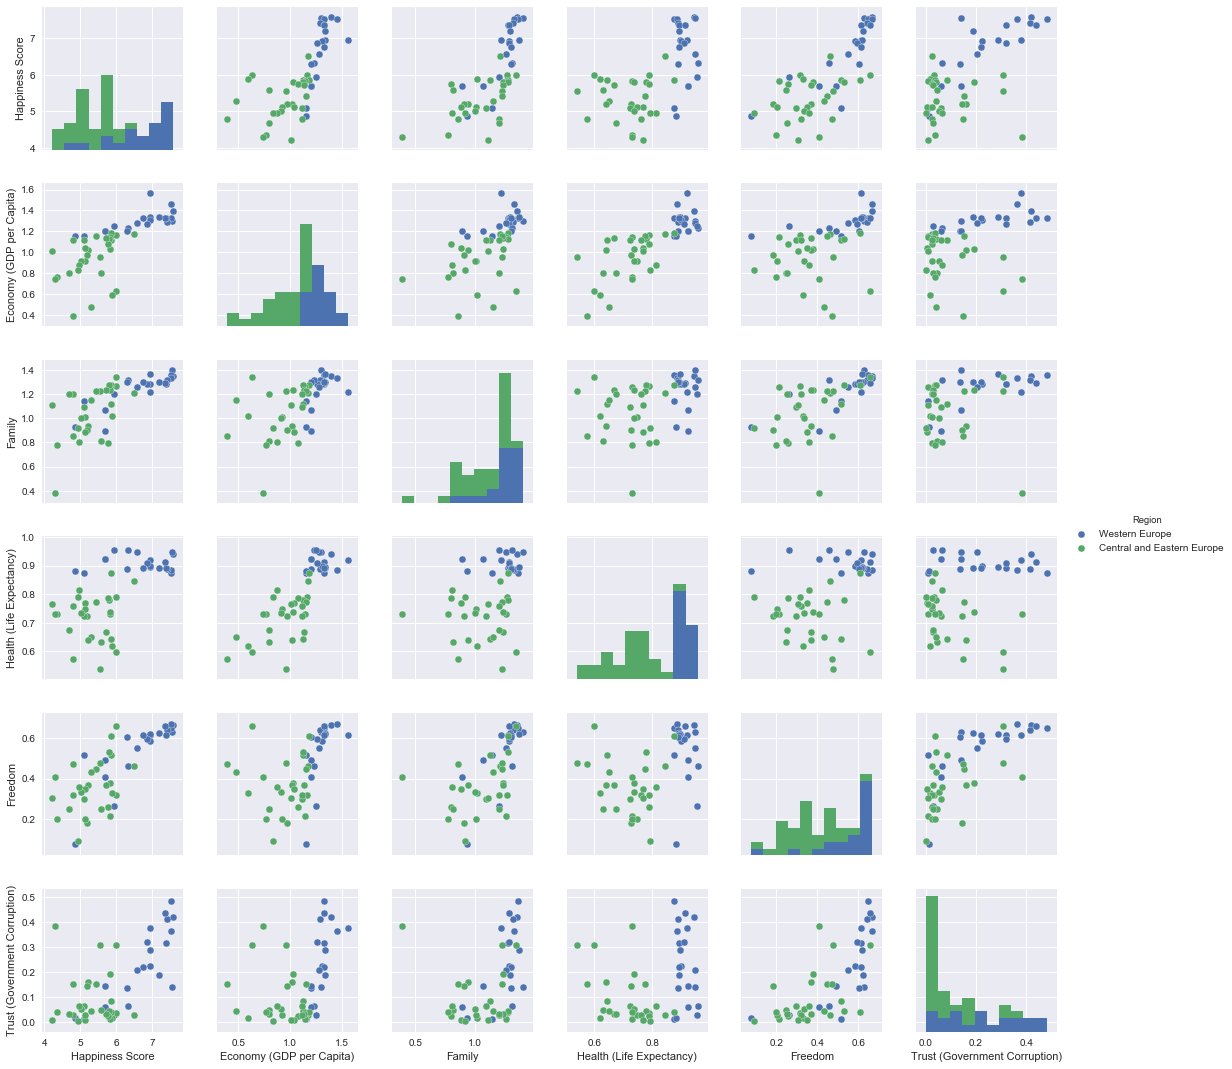

In [27]:
selectCols=  ['Happiness Score','Economy (GDP per Capita)','Family','Health (Life Expectancy)','Freedom','Trust (Government Corruption)','Region']
sns.pairplot(europe[selectCols], hue='Region',size=2.5)

C:\Users\rabiulawal\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning:

using a non-integer number instead of an integer will result in an error in the future



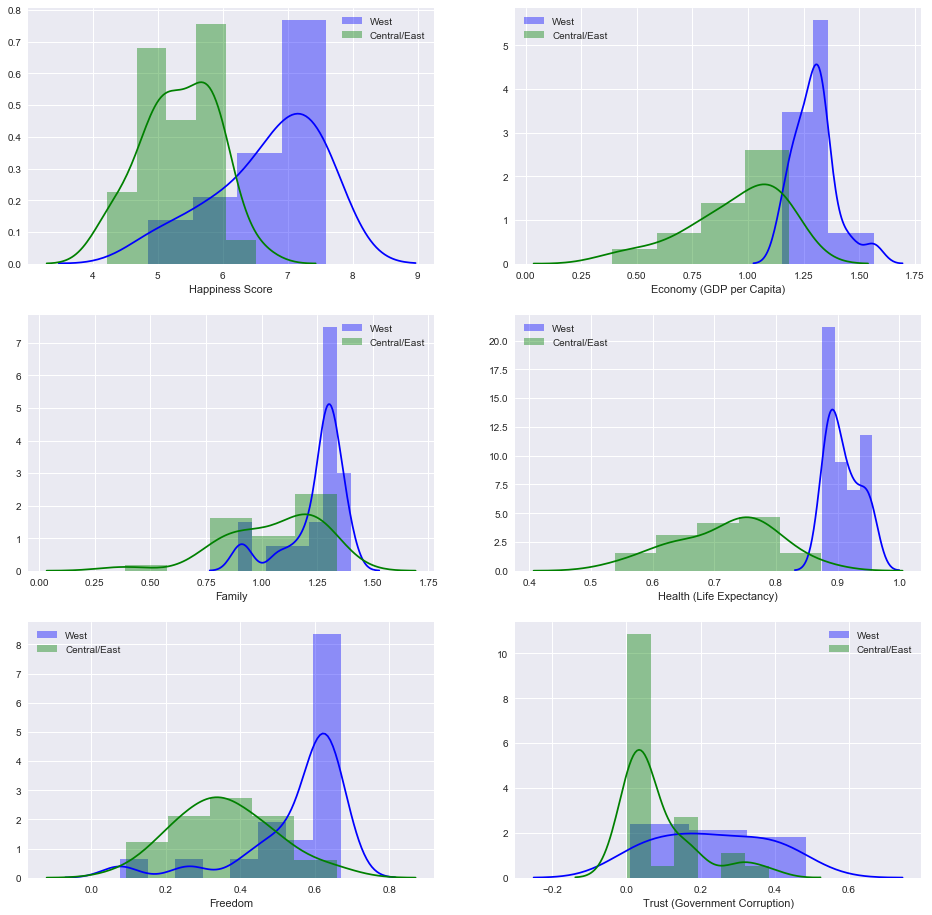

In [28]:
f, axes = plt.subplots(3, 2, figsize=(16, 16))
axes = axes.flatten()
compareCols = ['Happiness Score','Economy (GDP per Capita)','Family','Health (Life Expectancy)','Freedom','Trust (Government Corruption)']
for i in range(len(compareCols)):
    col = compareCols[i]
    axi = axes[i]
    sns.distplot(w_europe[col],color='blue' , label='West', ax=axi)
    sns.distplot(ec_europe[col],color='green', label='Central/East',ax=axi)
    axi.legend()

In [29]:
s_asia = df[df.Region=='Southern Asia']
e_asia = df[df.Region=='Eastern Asia']
se_asia = df[df.Region=='Southeastern Asia']

asia = pd.concat([s_asia, e_asia, se_asia],axis=0)
asia.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
78,Bhutan,Southern Asia,79,5.253,0.03225,0.77042,1.10395,0.57407,0.53206,0.15445,0.47998,1.63794
80,Pakistan,Southern Asia,81,5.194,0.03726,0.59543,0.41411,0.51466,0.12102,0.10464,0.33671,3.10709
108,Bangladesh,Southern Asia,109,4.694,0.03077,0.39753,0.43106,0.60164,0.40820,0.12569,0.21222,2.51767
116,India,Southern Asia,117,4.565,0.02043,0.64499,0.38174,0.51529,0.39786,0.08492,0.26475,2.27513
120,Nepal,Southern Asia,121,4.514,0.03607,0.35997,0.86449,0.56874,0.38282,0.05907,0.32296,1.95637


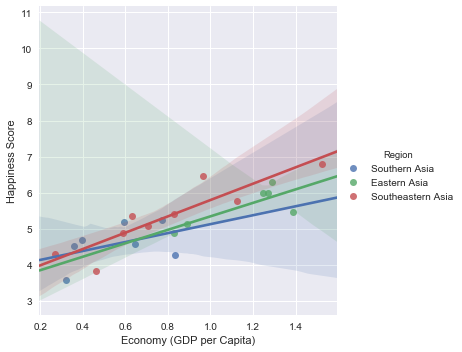

In [30]:
plt.figure(figsize=(12,8))
sns.lmplot(data=asia, x='Economy (GDP per Capita)', y='Happiness Score', hue="Region")
plt.show()

In [31]:
def plot_compare(dataset,regions,compareCols):
    n = len(compareCols)
    f, axes = plt.subplots(math.ceil(n/2), 2, figsize=(16, 6*math.ceil(n/2)))
    axes = axes.flatten()
    #compareCols = ['Happiness Score','Economy','Family','Health (Life Expectancy)','Freedom','Trust (Government Corruption)']
    for i in range(len(compareCols)):
        col = compareCols[i]
        axi = axes[i]
        for region in regions:
            this_region = dataset[dataset['Region']==region]
            sns.distplot(this_region[col], label=region, ax=axi)
        axi.legend()

C:\Users\rabiulawal\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning:

using a non-integer number instead of an integer will result in an error in the future



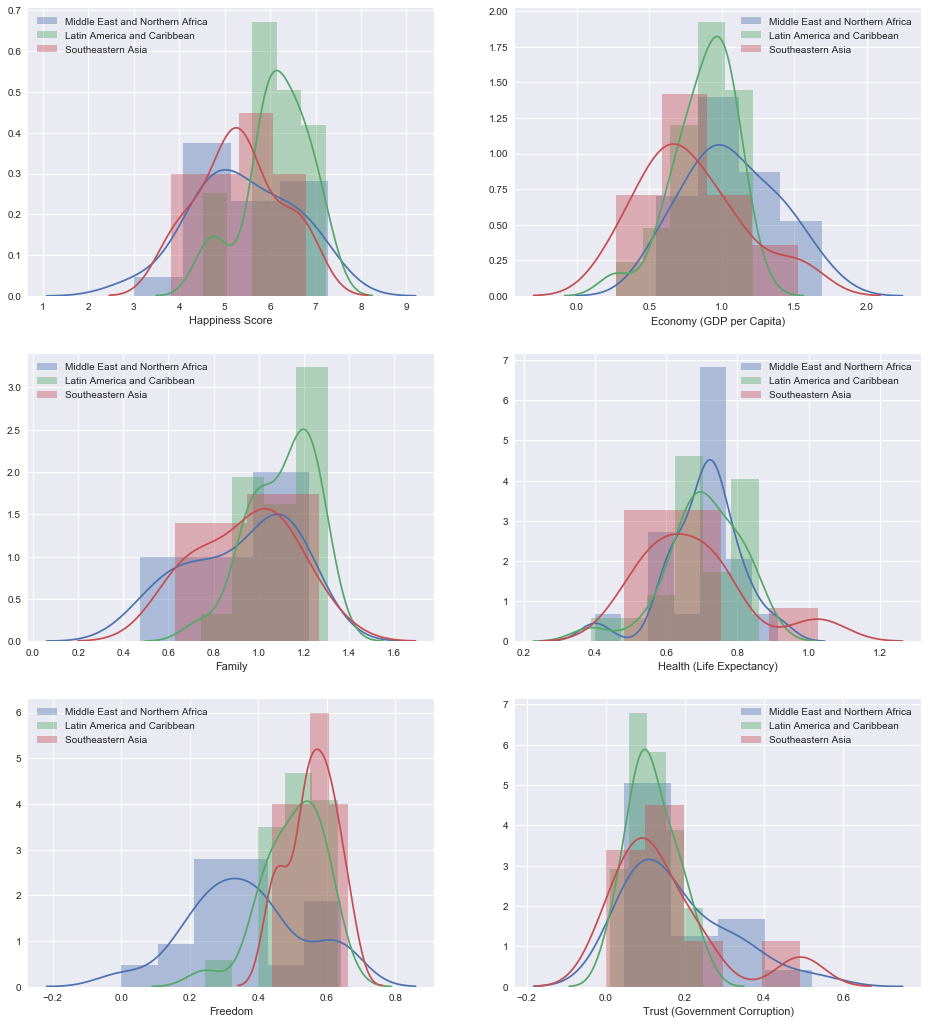

In [32]:
regions = [
       'Middle East and Northern Africa', 'Latin America and Caribbean',
       'Southeastern Asia']
selectCol = ['Happiness Score','Economy (GDP per Capita)','Family','Health (Life Expectancy)','Freedom','Trust (Government Corruption)']
plot_compare(df,regions,selectCol)

C:\Users\rabiulawal\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning:

using a non-integer number instead of an integer will result in an error in the future



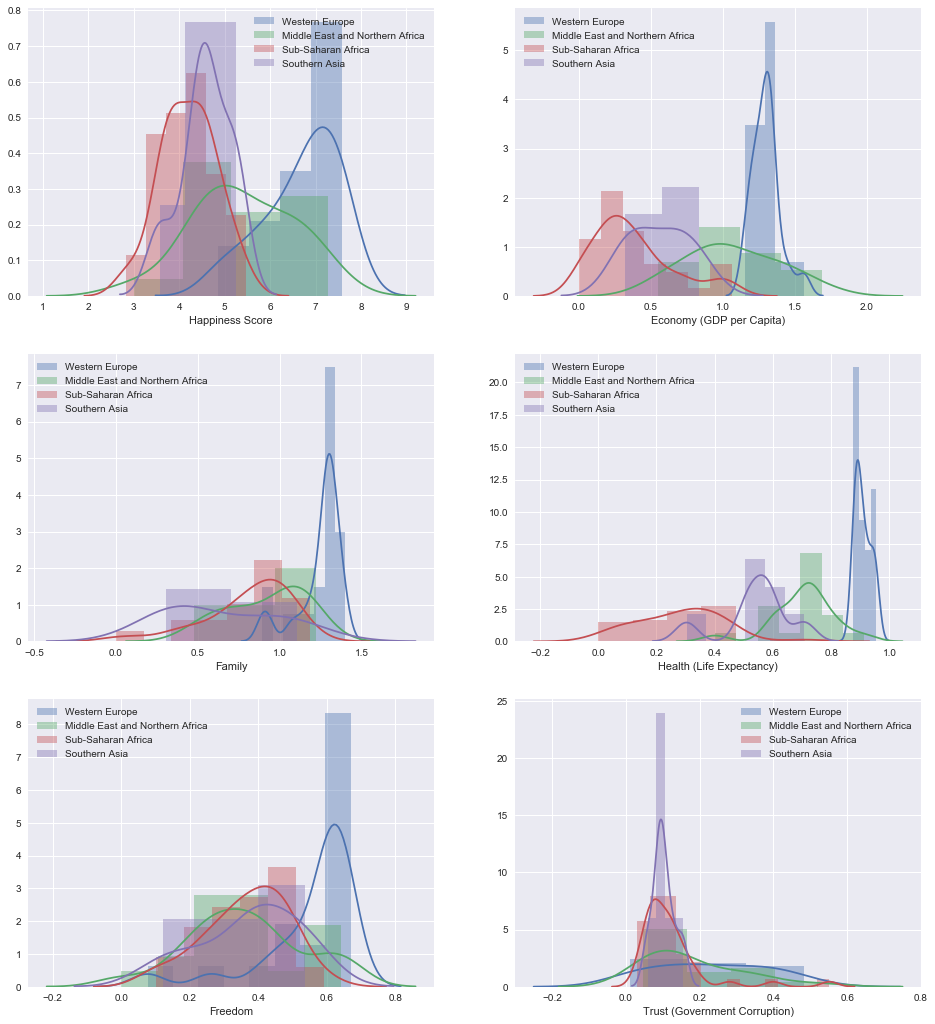

In [33]:
regions = ['Western Europe', 'Middle East and Northern Africa',
       'Sub-Saharan Africa', 'Southern Asia']
selectCol = ['Happiness Score','Economy (GDP per Capita)','Family','Health (Life Expectancy)','Freedom','Trust (Government Corruption)']
plot_compare(df, regions, selectCol)

### World Happiness Index Map 2015

In [34]:
data = dict(type = 'choropleth', 
           locations = df['Country'],
           locationmode = 'country names',
           z = df['Happiness Rank'], 
           text = df['Country'],
           colorscale = [[0,"rgb(5, 10, 172)"],[0.35,"rgb(40, 60, 190)"],[0.5,"rgb(70, 100, 245)"],
            [0.6,"rgb(90, 120, 245)"],[0.7,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"]],
        autocolorscale = False,
        reversescale = True,
        marker = dict(
            line = dict (
                color = 'rgb(120,120,120)',
                width = 0.5
            ) ),
        colorbar = dict(
            autotick = False,
            tickprefix = '',
            title = 'Happiness<br>Rank'),
      )

layout = dict(title = '2015 Global Happiness Index', 
             geo = dict(showframe = False, 
                        showcoastlines = False,
                       projection = {'type': 'Mercator'}))
choromap3 = dict(data = [data], layout=layout)
iplot(choromap3, validate = False, filename='Happiness-world-map-15')

### Construct Model for Predicting Happiness

In [35]:
X = df.drop(['Happiness Score', 'Happiness Rank', 'Country', 'Region'], axis=1)
y = df['Happiness Score']

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [37]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
print('Standardized features\n')
print(str(X_train[:4]))

Standardized features

[[ 0.85566837  1.98091502  0.30492891  0.58627458  1.34472782  2.85309101
   0.72288297 -0.92696713]
 [ 0.09144177  0.04810293  0.06431807  0.37961989 -1.64219107 -0.90448248
  -0.3767514  -0.08203336]
 [ 0.12984511  0.23141995  0.39578602 -2.57693048  0.35584167 -0.15760498
  -1.09956608 -1.09825992]
 [ 0.50510068 -0.34351062  0.11815545  0.08004023 -0.26590902 -0.21049333
  -1.08052729  1.74042234]]


In [38]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)

In [39]:
result_lm = pd.DataFrame({
    'Actual':y_test,
    'Predict':y_pred
})
result_lm['Diff'] = y_test - y_pred
result_lm.head()

,Actual,Predict,Diff
128,4.307,4.306911,0.000089
45,5.987,5.987124,-0.000124
134,4.194,4.194267,-0.000267
156,2.905,2.904485,0.000515
90,5.057,5.057173,-0.000173


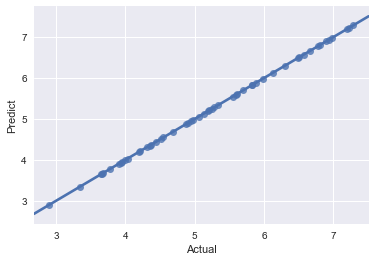

In [40]:
sns.regplot(x='Actual',y='Predict',data=result_lm)


In [41]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.000242812407581
MSE: 8.37137703275e-08
RMSE: 0.000289333320458


In [42]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

In [43]:
result_rf = pd.DataFrame({
    'Actual':y_test,
    'Predict':y_pred
})
result_rf['Diff'] = y_test - y_pred
result_rf.head()

,Actual,Predict,Diff
128,4.307,3.5090,0.7980
45,5.987,6.5984,-0.6114
134,4.194,4.4285,-0.2345
156,2.905,3.4354,-0.5304
90,5.057,4.9843,0.0727


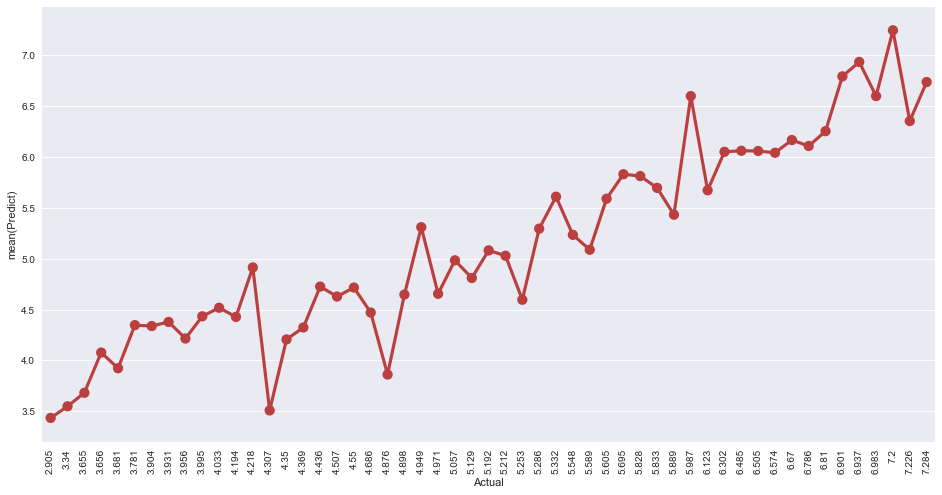

In [44]:
plt.figure (figsize = (16, 8))
sns.pointplot(x='Actual',y='Predict',data=result_rf, dodge = True, color="#bb3f3f")
plt.xticks(rotation = 90)
plt.show()

### Investigation result
1. Happiness Ranking basically depends on Economy. Countries having strong GDP rate are happiest countries indeed. 
2. Happiness score depends on family, health, freedom, trust on govt. etc. All of these terms have a great linear relationship with happiness score.
3. World happiness doesn't define generosity or genesrosity has no remarkable impact on Happiness score.
4. Regression Model works quite good in our happiness Dataset. Erros is too small to consider. We can easily check differences on above plots. 